# Quantum Wave Functions via Path Integrals: The Metropolis Algorithm

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 

In [211]:
m = 1
k = 1
eps = 1.4
a = .5

In [212]:
def harmonic_potential(x):
    V = .5*k*x**2
    return V

def action(x,V = None):
    if V is None:
        V = harmonic_potential(x)
                
    fx = x
    fxma = np.roll(x,-1)
    fxpa = np.roll(x,1)
    fxm2a = np.roll(x,-2)
    fxp2a = np.roll(x,2)
    diff = (fxpa + fxma - 2*fx)/a**2
    diff2 = (6*fx+fxm2a - 4*fxma - 4*fxpa + fxp2a)/a**4
    diff2high = diff - a**2 * diff2 /12
    
    S = np.sum(m/2 * (-fx*diff2high)+a*V)
    return S

def green(configs):
    N = configs[0].size
    g = np.zeros((N))
    for n in range(N):
        g[n] = np.sum(np.average(np.roll(configs,n,axis=1)*configs,axis=0),axis=0)/(N*configs[1].size)
    return g/N

def metropolis_step(x,S0 = None):
    if S0 is None:
        S0 = action(x)
    
    r = (np.random.random()*2-1)*eps
    idx = np.random.randint(0,x.size)
    x[idx] += r
    Snu = action(x)

    prob = np.random.random()
    if prob<np.exp(-(Snu-S0)):
        S0 = Snu
    else:
        x[idx] -= r

    return x,S0
    

def metropolis(N,N_cf = None,N_cor = None):
    if N_cor is None:
        N_cor = 50
    if N_cf is None:
        N_cf = 1000
    x = np.zeros((N+1))
    S0 = action(x)
    
    print(N_cf*N_cor)
    
    for n in range(N_cor*N):
        x,S0 = metropolis_step(x,S0)
    
    plt.plot(x)
    plt.show()
    
    configs = []
    greens = []
    
    for n in range(N_cor*N_cf):
        
        x,S0 = metropolis_step(x,S0)
        
        if n%N_cor == 0:
            print(n,end='\r')
            configs.append(x.copy())
            #greens.append(green(x))
    configs = np.asarray(configs)
    return configs
    

200000


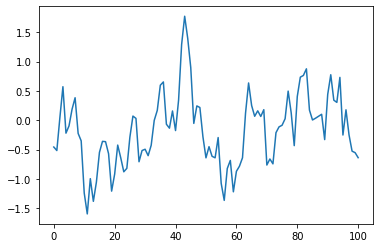

In [213]:
configs = metropolis(100,1000,200)

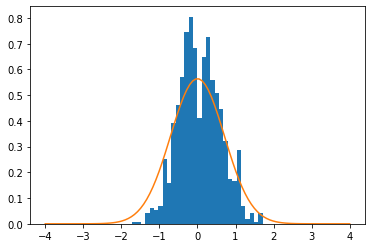

In [214]:
greens = green(configs)
plt.hist(configs[:,0],bins=30,density=True)
x=np.linspace(-4,4,100)
psi = (np.exp(-x**2/2)/(np.pi**0.25))**2
plt.plot(x,psi)
plt.show()
#plt.plot((np.log(greens[:-1][:10]/greens[1:][:10])/a))
plt.show()

In [215]:
from sympy import *

a, x, t = symbols("a,x, t")
a

a

In [216]:
def Diff2(f):
    def func(x):
        return simplify((f(x+a)+f(x-a)-2*f(x))/a**2)
    return func

In [217]:
f = Function("f")
Diff2(f)(x)

(-2*f(x) + f(-a + x) + f(a + x))/a**2

In [218]:
Diff2(Diff2(f))(x)

(6*f(x) + f(-2*a + x) - 4*f(-a + x) - 4*f(a + x) + f(2*a + x))/a**4

In [280]:
def taylor(u):
    f = Function('f')
    if u is x:
        return f(x)
    t = symbols("t")
    expansion = series(f(t),x0=x,n=8)
    #remove the "Big O" term because it limits substitution
    expansion = Add(*expansion.args[:-2],expansion.args[-1])
    return expansion.subs(t,u)

taylor(x+a)

a**7*Subs(Derivative(f(_xi_1), (_xi_1, 7)), _xi_1, x)/5040 + a**6*Subs(Derivative(f(_xi_1), (_xi_1, 6)), _xi_1, x)/720 + a**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, x)/120 + a**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + a**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + a**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + a*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + f(x)

In [276]:
Diff2(taylor)(x)

a**4*Derivative(f(x), (x, 6))/360 + a**2*Derivative(f(x), (x, 4))/12 + Derivative(f(x), (x, 2))

In [277]:
simplify(Diff2(taylor)(x) - (a**2/12 * Diff2(Diff2(taylor))(x)))

-a**4*Derivative(f(x), (x, 6))/90 + Derivative(f(x), (x, 2))

In [278]:
simplify(Diff2(taylor)(x) - (a**2/12 * Diff2(Diff2(taylor))(x)) + a**4/90 * Diff2(Diff2(Diff2(taylor)))(x))

Derivative(f(x), (x, 2))